In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
df = pd.read_csv("movies2.csv", encoding="latin1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (15509, 10)

Columns:
 Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Missing Values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Summary Statistics:
             Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [9]:

num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
label = LabelEncoder()


for col in cat_cols:
    df[col] = label.fit_transform(df[col])

In [12]:
if 'title' in df.columns:
    df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))

if 'genre' in df.columns:
    df['genre_count'] = df['genre'].apply(lambda x: len(str(x).split(',')))

In [15]:
X = df.drop('Rating', axis=1)
y = df['Rating']

In [14]:
print(df.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
models = {
     'Linear Regression': LinearRegression(),
     'Random Forest Regressor': RandomForestRegressor(),
     'Gradient Boosting Regressor': GradientBoostingRegressor()
}


results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    results[name] = [mae, mse, r2]

In [21]:
print("\nModel Evaluation Results:\n")
for name, metrics in results.items():
    print(f"{name} → MAE: {metrics[0]}, MSE: {metrics[1]}, R²: {metrics[2]}")


Model Evaluation Results:

Linear Regression → MAE: 0.6124035926414444, MSE: 0.9253919329028226, R²: 0.04835185406578091
Random Forest Regressor → MAE: 0.49891618310767244, MSE: 0.7769751283043198, R²: 0.20097969952213246
Gradient Boosting Regressor → MAE: 0.5324150071412633, MSE: 0.7721022730130337, R²: 0.2059908126931883


In [22]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
final_preds = best_model.predict(X_test)

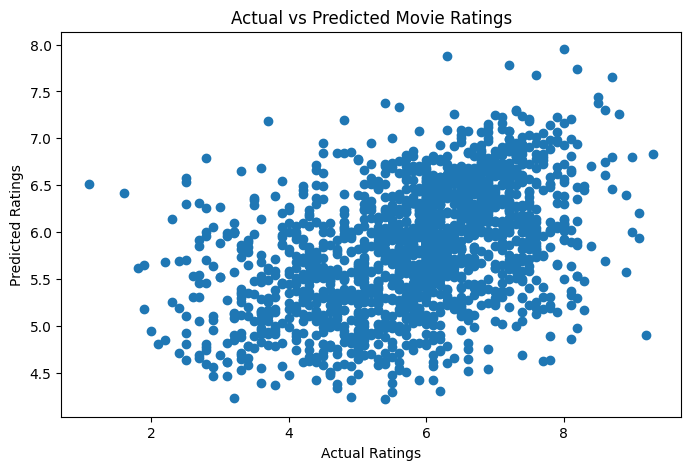


Movie Rating Prediction Notebook Completed Successfully.


In [24]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, final_preds)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.show()


print("\nMovie Rating Prediction Notebook Completed Successfully.")